<a href="https://colab.research.google.com/github/kavyareddy01/pytorchbirble/blob/main/neuralnwclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network Classification with Pytorch

Classificatn is a problem of predicting whether something is one thing or another


### CLASSIFICATION PROBLEMS

> Binary classification (email spam or not spam)

> Multiclass classification(more than one thing or another)

> Multi Label Classification(multiple label options per sample)

### Broadly covering of below topics
* architecture of a nn classification model
* i/p and o/p shapes of a classificatn model(features and labels)
* creating custom data to view,fit on and predict on
* steps in modelling
* creating a model,setting a loss functn and optimiser,creating training loops,evaluating a model
* saving & loading models
* harnessing the power of non-linearity
* diff classificatn evaluation methods

### 1.make classificatn data and get it ready

---



In [45]:
import sklearn

In [46]:
from sklearn.datasets import make_circles

##make 1000 samples
n=1000
##create circles
X,y=make_circles(n,noise=0.03,random_state=42)

In [47]:
len(X),len(y)

(1000, 1000)

In [48]:
print(f"first 5 samples of X:\n{X[:5]}")
print(f"first 5 samples of y:\n{y[:5]}")

first 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y:
[1 1 1 1 0]


In [49]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [50]:
##DATAFRAMES
import pandas as pd
circles=pd.DataFrame({"x1":X[:,0],
                      "x2":X[:,1],
                      "label":y})
circles.head(10)


,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


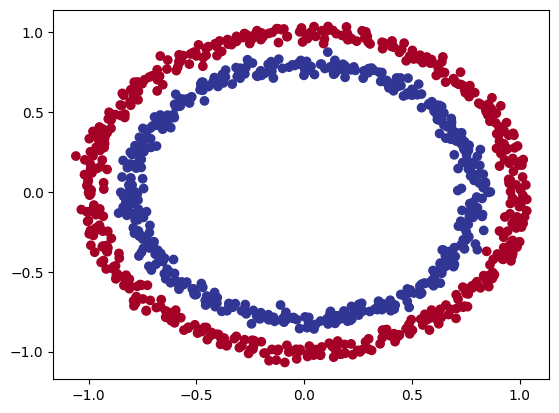

In [51]:
# Visualise
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

###CHECK IMPUT AND OUTPUT SHAPES

In [52]:
X.shape,y.shape


((1000, 2), (1000,))

In [53]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [54]:
# View the first example of features and labels
x_sample=X[0]
y_sample=y[0]
print("Values for one sample of x : ",x_sample," and the same for y : ",y_sample)
print("Shape for one sample of x : ",x_sample.shape," and the same for y : ",y_sample.shape)

Values for one sample of x :  [0.75424625 0.23148074]  and the same for y :  1
Shape for one sample of x :  (2,)  and the same for y :  ()


### Turn data into tensors and create train and test splits

In [55]:
import torch
torch.__version__

'2.1.0+cu121'

In [56]:
type(X),X.dtype


(numpy.ndarray, dtype('float64'))

In [57]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [58]:
y=torch.tensor(y,dtype=torch.float32)

In [59]:
type(X),X.dtype,y.dtype

(numpy.ndarray, dtype('float64'), torch.float32)

In [60]:
# Split data into train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [61]:
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

###2.BUILDING A MODEL
Model to classify blue and red dots

* setup device agonistic code so our code will run on an accelerator if there is one.
* Construct a model
* Define a loss function and optimizer
* Create a training and test loop

Creating a mode

* Subclasses nn.module
* Create 2 nn.linear() layers that are capable of handling the shapes of our data
* Defines a forward() method that outlines the forward pass
* Instatiate an instance of our model class and send it to target device

In [62]:
# import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [63]:
x_train

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])

In [64]:
x_train.shape

(800, 2)

In [65]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [66]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
# 4. Instantiate an instance of our model class and send it to the target device
model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [67]:
device

'cpu'

In [68]:
next(model_0.parameters()).device

device(type='cpu')

In [69]:
model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [70]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5670,  0.6114],
                      [-0.6175,  0.6381],
                      [ 0.5583,  0.6512],
                      [-0.0203,  0.1975],
                      [-0.4888,  0.5667]])),
             ('0.bias', tensor([-0.5470,  0.0611, -0.3846, -0.0710,  0.4563])),
             ('1.weight',
              tensor([[-0.4162,  0.1605, -0.0338,  0.2846, -0.1153]])),
             ('1.bias', tensor([-0.3547]))])

In [71]:
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)

with torch.no_grad():
    untrained_preds = model_0(x_test_tensor)
print(f"Length of prediction: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)}, shape: {x_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of prediction: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: (200, 2)

First 10 predictions:
tensor([[-0.],
        [-0.],
        [ 0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [ 0.],
        [-0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [72]:
x_test[:10],y_test[:10]

(array([[-0.37519302,  0.68265972],
        [ 0.01538035,  0.96002602],
        [-0.7027836 , -0.31471699],
        [-0.28525015,  0.96637754],
        [ 0.40241682, -0.74375355],
        [ 0.63227933, -0.57110803],
        [ 0.85606699,  0.54994305],
        [ 1.00335945,  0.19028381],
        [-0.74891503, -0.2951126 ],
        [ 0.0537797 ,  0.97388312]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Setup loss function and optimizer
* For regression MAE or MSE

* For classification binary cross entropy or categorical cross entropy (cross entropy)

* For optimizers SGD and ADAM

In [73]:
#setup loss functn
loss_fn=nn.BCEWithLogitsLoss() # BCEWithLogitsLoss=sigmoid activation function built-in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [74]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5670,  0.6114],
                      [-0.6175,  0.6381],
                      [ 0.5583,  0.6512],
                      [-0.0203,  0.1975],
                      [-0.4888,  0.5667]])),
             ('0.bias', tensor([-0.5470,  0.0611, -0.3846, -0.0710,  0.4563])),
             ('1.weight',
              tensor([[-0.4162,  0.1605, -0.0338,  0.2846, -0.1153]])),
             ('1.bias', tensor([-0.3547]))])

In [75]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

### 3.Train model
To build training loop :

* Forward pass
* Calculate the loss
* Optimizer zero grad
* Loss backward
* Optimizerr step

In [76]:
device

'cpu'

In [77]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [92]:
import torch

# Assuming x_test is your NumPy array
x_test_tensor = torch.from_numpy(x_test).to(device)

# Accessing the parameters of the first layer
first_layer_params = next(model_0.parameters())

# Ensure that the input tensor has the same dtype as the model's parameters
x_test_tensor = x_test_tensor.to(first_layer_params.dtype)

y_logits = model_0(x_test_tensor)[:5]
y_logits

tensor([[-0.1883],
        [-0.3576],
        [ 0.0938],
        [-0.2676],
        [-0.1629]], grad_fn=<SliceBackward0>)

In [91]:
import torch

# Assuming x_test is your NumPy array
x_test_tensor = torch.from_numpy(x_test).to(device)

# Ensure that the input tensor has the same dtype as the model's parameters
x_test_tensor = x_test_tensor.to(model_0.parameters().__next__().dtype)

model_0.eval()
with torch.inference_mode():
    y_logits = model_0(x_test_tensor)[:5]

# Now y_logits contains the model predictions
y_logits


tensor([[-0.1883],
        [-0.3576],
        [ 0.0938],
        [-0.2676],
        [-0.1629]])

In [85]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4531],
        [0.4115],
        [0.5234],
        [0.4335],
        [0.4594]])

In [90]:
import torch

# Assuming x_test is your NumPy array
x_test_tensor = torch.from_numpy(x_test).to(device)

# Ensure that the input tensor has the same dtype as the model's parameters
x_test_tensor = x_test_tensor.to(model_0.parameters().__next__().dtype)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test_tensor)))

# Get rid of extra dimensions
y_pred_labels = y_pred_labels.squeeze()
y_pred_labels

tensor([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
        0., 0.], grad_fn=<SqueezeBackward0>)

In [93]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building a training and testing loop


In [98]:
import torch

# Move NumPy arrays to PyTorch tensors and then move them to the target device
x_train_tensor, y_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device), torch.tensor(y_train, dtype=torch.float32).to(device)
x_test_tensor, y_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device), torch.tensor(y_test, dtype=torch.float32).to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # Training
    model_0.train()
    # 1. Forward pass
    y_logits = model_0(x_train_tensor).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # 2. Calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits), y_train_tensor)
    acc = accuracy_fn(y_true=y_train_tensor, y_pred=y_pred)
    # Optimizer zero grad
    optimizer.zero_grad()
    # Loss backward
    loss.backward()
    optimizer.step()

    # Evaluation
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(x_test_tensor).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test_tensor)
        test_acc = accuracy_fn(y_true=y_test_tensor, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}| Loss: {loss.item():.5f}, Acc: {acc:.2f}% | Test loss: {test_loss.item():.5f}, Test acc: {test_acc:.2f}%")


<ipython-input-98-d7df9402cab9>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_tensor, y_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device), torch.tensor(y_train, dtype=torch.float32).to(device)
<ipython-input-98-d7df9402cab9>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor, y_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device), torch.tensor(y_test, dtype=torch.float32).to(device)


Epoch: 0| Loss: 0.71974, Acc: 46.50% | Test loss: 0.69771, Test acc: 51.00%
Epoch: 10| Loss: 0.71813, Acc: 43.62% | Test loss: 0.70030, Test acc: 46.50%
Epoch: 20| Loss: 0.71664, Acc: 48.00% | Test loss: 0.70356, Test acc: 49.00%
Epoch: 30| Loss: 0.71525, Acc: 50.00% | Test loss: 0.70739, Test acc: 50.00%
Epoch: 40| Loss: 0.71397, Acc: 50.00% | Test loss: 0.71171, Test acc: 50.00%
Epoch: 50| Loss: 0.71277, Acc: 50.00% | Test loss: 0.71646, Test acc: 50.00%
Epoch: 60| Loss: 0.71167, Acc: 50.00% | Test loss: 0.72156, Test acc: 50.00%
Epoch: 70| Loss: 0.71065, Acc: 50.00% | Test loss: 0.72696, Test acc: 50.00%
Epoch: 80| Loss: 0.70971, Acc: 50.00% | Test loss: 0.73260, Test acc: 50.00%
Epoch: 90| Loss: 0.70883, Acc: 50.00% | Test loss: 0.73844, Test acc: 50.00%


###4. Make predictions and evaluate the model

In [99]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

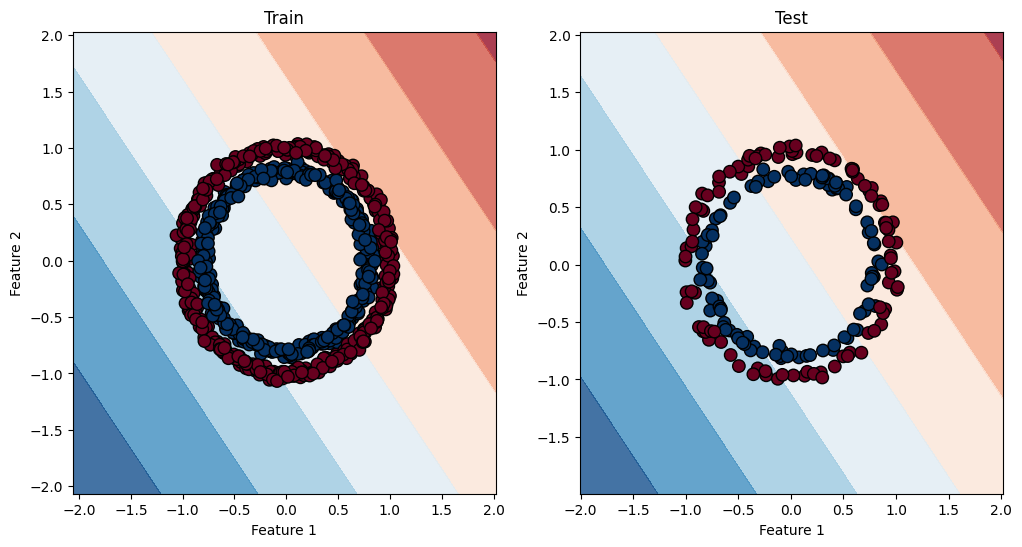

In [102]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Concatenate the meshgrid coordinates as input to the model
    input_data = np.c_[xx.ravel(), yy.ravel()]
    input_tensor = torch.tensor(input_data, dtype=torch.float32).to("cpu")

    # Get predictions
    model.eval()
    with torch.inference_mode():
        Z = torch.sigmoid(model(input_tensor)).detach().numpy()

    # Reshape the predictions to match the meshgrid shape
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, marker='o', s=80)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)
plt.show()


### 5. Improving a model(from a model perspective)

In [103]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5589,  0.6018],
                      [-0.6138,  0.6425],
                      [ 0.5588,  0.6519],
                      [-0.0133,  0.2058],
                      [-0.4927,  0.5620]])),
             ('0.bias', tensor([-0.4672,  0.0245, -0.3909, -0.1407,  0.4955])),
             ('1.weight',
              tensor([[-0.2677,  0.1539,  0.0879,  0.3144, -0.2219]])),
             ('1.bias', tensor([-0.5888]))])

In [104]:
x_train[:5]

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       [-0.96657519, -0.22562157],
       [-0.16659009,  0.79944645]])

In [105]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [106]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

Preparing data to see if our model can fit a straight line


In [107]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [108]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


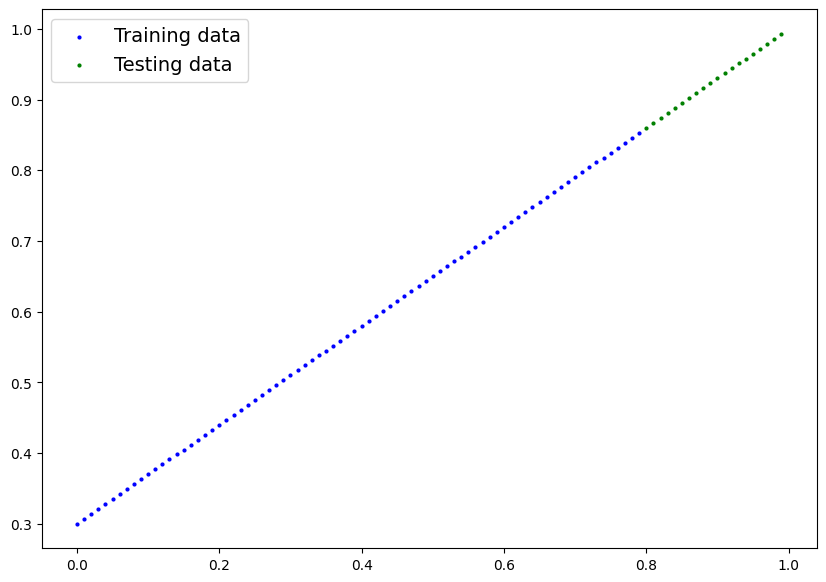

In [109]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression);


Adjusting model_1 to fit a straight line

In [110]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [111]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [112]:
import torch

# Move NumPy arrays to PyTorch tensors and then move them to the target device
x_train_tensor, y_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device), torch.tensor(y_train, dtype=torch.float32).to(device)
x_test_tensor, y_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device), torch.tensor(y_test, dtype=torch.float32).to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # Training
    model_0.train()
    # 1. Forward pass
    y_logits = model_0(x_train_tensor).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # 2. Calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits), y_train_tensor)
    acc = accuracy_fn(y_true=y_train_tensor, y_pred=y_pred)
    # Optimizer zero grad
    optimizer.zero_grad()
    # Loss backward
    loss.backward()
    optimizer.step()

    # Evaluation
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(x_test_tensor).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test_tensor)
        test_acc = accuracy_fn(y_true=y_test_tensor, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}| Loss: {loss.item():.5f}, Acc: {acc:.2f}% | Test loss: {test_loss.item():.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 10| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 20| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 30| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 40| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 50| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 60| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 70| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 80| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%
Epoch: 90| Loss: 0.50029, Acc: 50.00% | Test loss: 1.15310, Test acc: 50.00%


<ipython-input-112-d7df9402cab9>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_tensor, y_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device), torch.tensor(y_train, dtype=torch.float32).to(device)
<ipython-input-112-d7df9402cab9>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor, y_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device), torch.tensor(y_test, dtype=torch.float32).to(device)


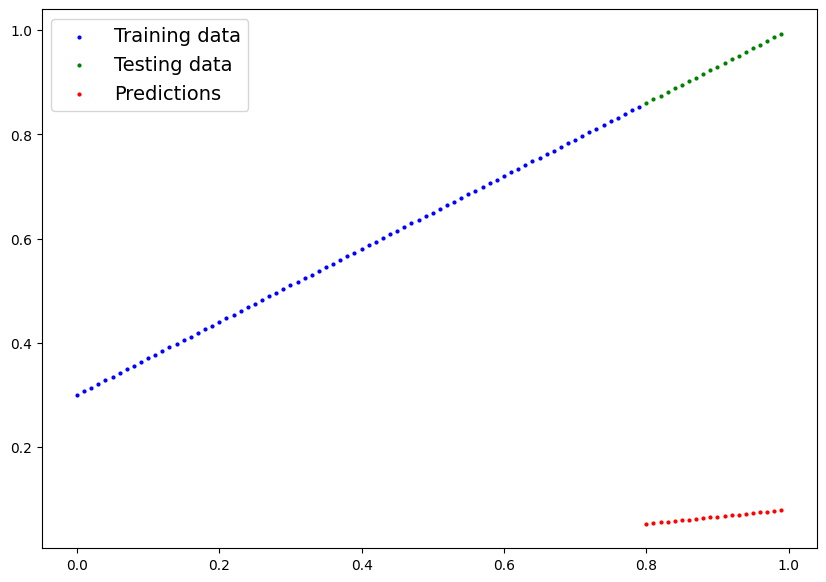

In [113]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

### 6. The missing piece: non-linearity

Recreating non-linear data


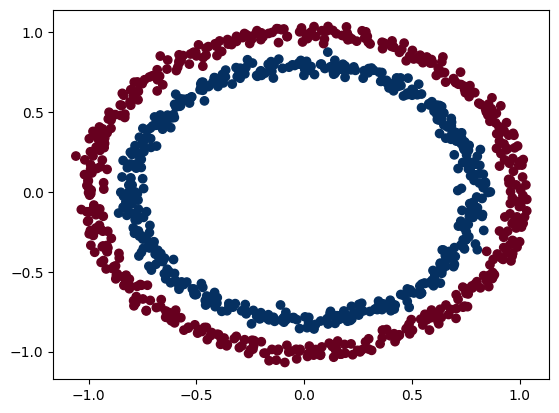

In [114]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

Building a model with non-linearity

In [115]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


Training a model with non-linearity

In [123]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Convert NumPy arrays to PyTorch tensors and move them to the target device
x_train, y_train = torch.tensor(x_train, dtype=torch.float32).to(device), torch.tensor(y_train, dtype=torch.float32).to(device)
x_test, y_test = torch.tensor(x_test, dtype=torch.float32).to(device), torch.tensor(y_test, dtype=torch.float32).to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy:  {test_acc:.2f}%")



<ipython-input-123-fc60e0a7c855>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train = torch.tensor(x_train, dtype=torch.float32).to(device), torch.tensor(y_train, dtype=torch.float32).to(device)
<ipython-input-123-fc60e0a7c855>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test, y_test = torch.tensor(x_test, dtype=torch.float32).to(device), torch.tensor(y_test, dtype=torch.float32).to(device)


Epoch: 0 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 100 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 200 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 300 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 400 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 500 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 600 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 700 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 800 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%
Epoch: 900 | Loss: 0.50742, Accuracy: 52.62% | Test Loss: 0.50744, Test Accuracy:  52.00%


 Model evaluation with non-linear activation function

In [125]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 1., 1., 1., 1., 1., 0., 0., 1., 1.]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

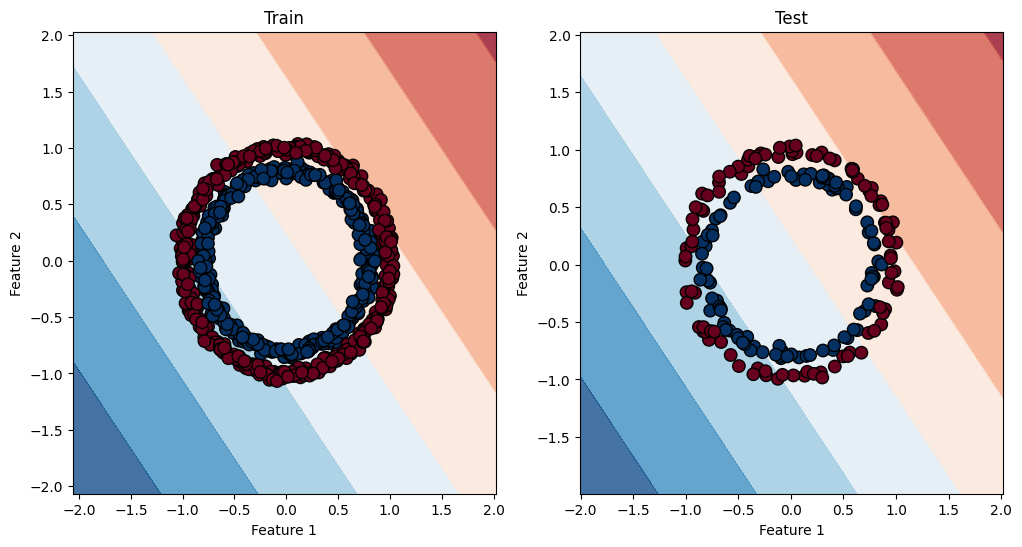

In [126]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Concatenate the meshgrid coordinates as input to the model
    input_data = np.c_[xx.ravel(), yy.ravel()]
    input_tensor = torch.tensor(input_data, dtype=torch.float32).to("cpu")

    # Get predictions
    model.eval()
    with torch.inference_mode():
        Z = torch.sigmoid(model(input_tensor)).detach().numpy()

    # Reshape the predictions to match the meshgrid shape
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, marker='o', s=80)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)
plt.show()

### 7. Non-linear activation function replication

In [127]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

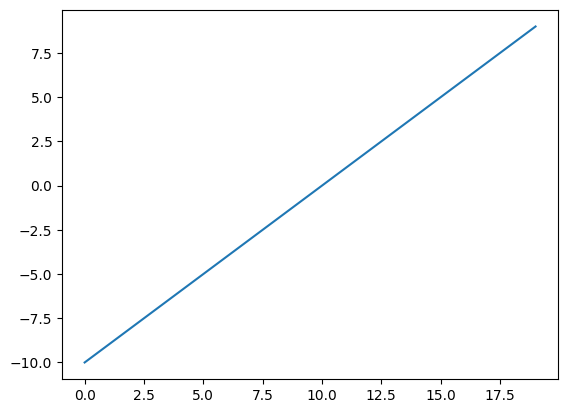

In [128]:
# Visualize the toy tensor
plt.plot(A);

In [129]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

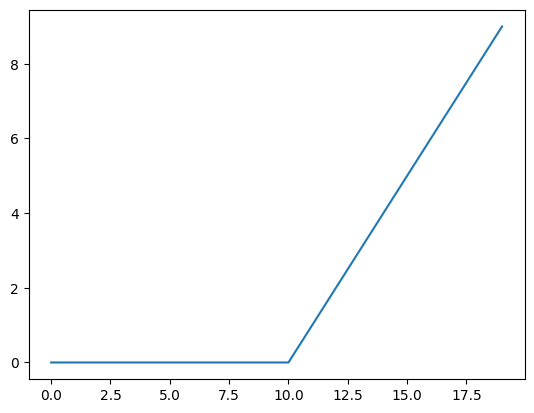

In [130]:
plt.plot(relu(A));

In [131]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))
# Test custom sigmoid on toy tensor
sigmoid(A)


tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

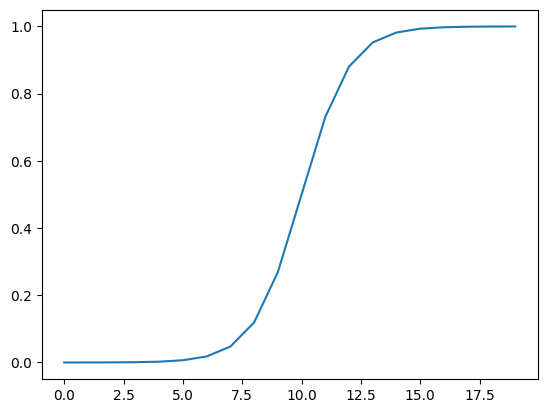

In [132]:
plt.plot(sigmoid(A));

###8.Putting things together

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


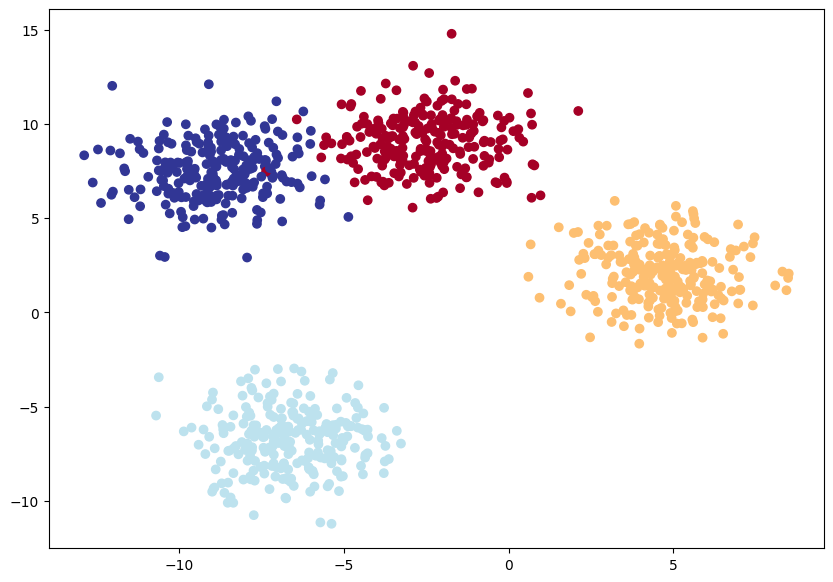

In [133]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5,
    random_state=RANDOM_SEED
)
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])
# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

Building a multi class classification model

In [134]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [135]:
from torch import nn
# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

Creating loss function and optimizer

In [136]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

Getting prediction probabilities

In [137]:
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [138]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [139]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], grad_fn=<SliceBackward0>)


In [140]:
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [141]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], grad_fn=<SelectBackward0>)
tensor(3)


 Creating a training and testing loop for a multi-class

In [142]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.2f}, Test Acc:{test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.58, Test Acc:95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13, Test Acc:99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07, Test Acc:99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05, Test Acc:99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04, Test Acc:99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03, Test Acc:99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03, Test Acc:99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.03, Test Acc:99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.03, Test Acc:99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02, Test Acc:99.50%


Making and evaluating predictions with a PyTorch

In [143]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [144]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


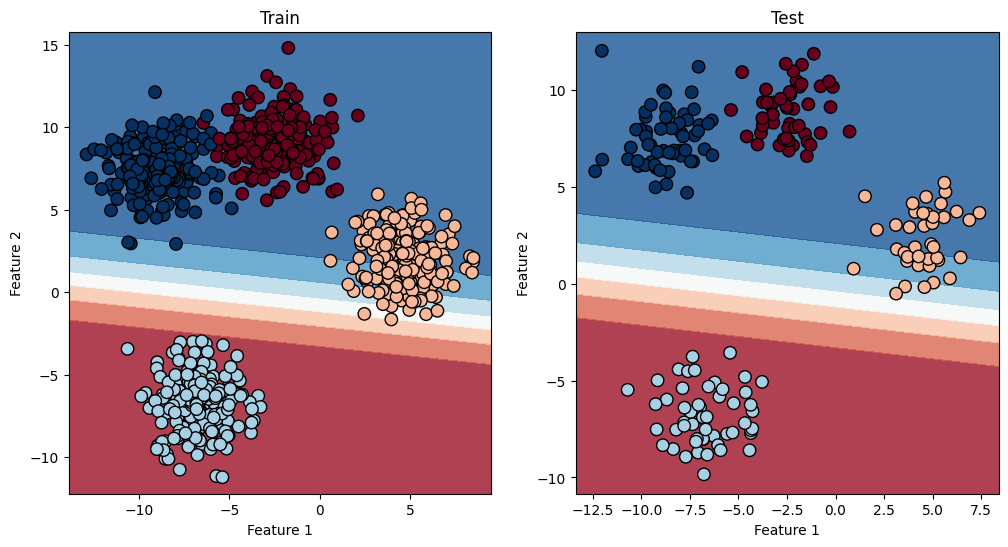

In [150]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y):
    h = .02  # Step size in the mesh

    # Determine meshgrid dimensions based on input data
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Concatenate the meshgrid coordinates as input to the model
    input_data = np.c_[xx.ravel(), yy.ravel()]
    input_tensor = torch.tensor(input_data, dtype=torch.float32).to("cpu")

    # Get predictions
    model.eval()
    with torch.inference_mode():
        Z = torch.sigmoid(model(input_tensor)).detach().numpy()

    # Reshape the predictions to match the meshgrid shape
    Z = Z[:, 0].reshape(xx.shape)

    # Plot decision boundary directly on the meshgrid coordinates
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, marker='o', s=80)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
plt.show()


### 9. More classification evaluation metrics

In [147]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 3.5 MB/s eta 0:00:00


tensor(0.9950)